In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

In [14]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [15]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [16]:
from pandas import ExcelFile

In [17]:
df = pd.read_excel('NHH Historical Data.xlsx')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-07-01,44180,44571,44571,43946,395.55K,-0.0070
1,2021-07-02,43868,44102,44102,43633,228.91K,-0.0071
2,2021-07-05,43399,43789,43789,41444,348.74K,-0.0107
3,2021-07-06,43789,43555,44337,43399,275.34K,0.0090
4,2021-07-07,43555,43399,43711,42695,271.88K,-0.0053


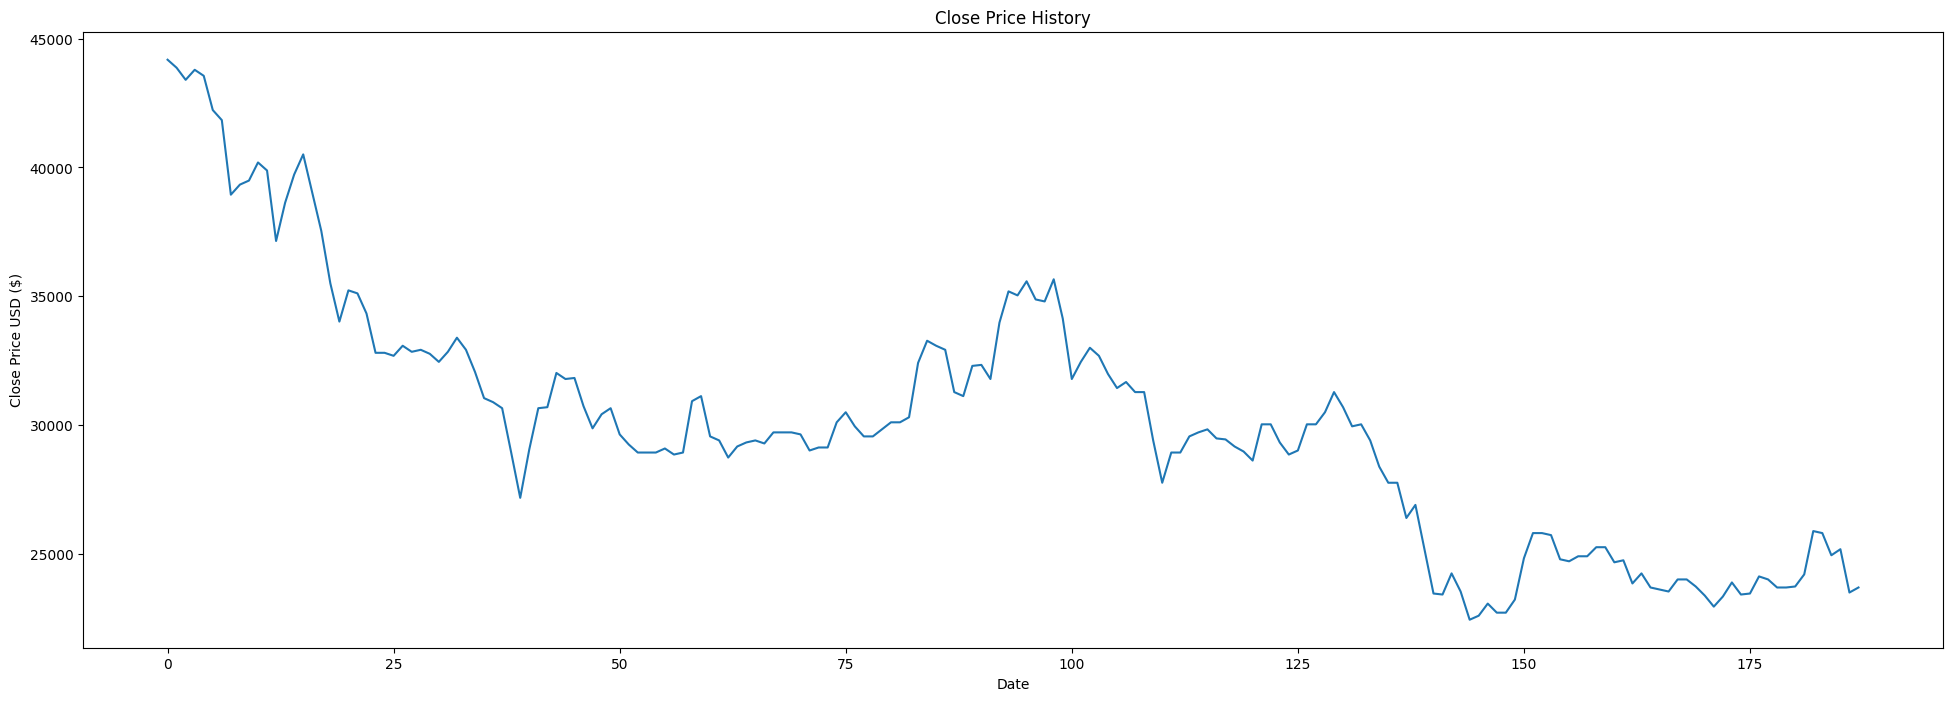

In [18]:
plt.figure(figsize=(24,8))
plt.title('Close Price History')
plt.plot(df['Price'])
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()

In [19]:
# Create a new dataframe with only the 'Price column 
data = df.filter(['Price'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset)) - 62)

training_data_len

126

In [20]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[1.        ],
       [0.98564725],
       [0.96407213],
       [0.98201306],
       [0.9712485 ],
       [0.91011133],
       [0.89212439],
       [0.75899347],
       [0.7769804 ],
       [0.78420278],
       [0.81654246],
       [0.80218971],
       [0.67628117],
       [0.74464072],
       [0.79496734],
       [0.83094121],
       [0.76262766],
       [0.6942681 ],
       [0.60074524],
       [0.53238568],
       [0.58814058],
       [0.5827583 ],
       [0.54678443],
       [0.47663078],
       [0.47663078],
       [0.4712485 ],
       [0.48923544],
       [0.47842488],
       [0.48201306],
       [0.47483669],
       [0.46043794],
       [0.47842488],
       [0.50358819],
       [0.48201306],
       [0.44245101],
       [0.39571258],
       [0.3884902 ],
       [0.37772564],
       [0.29855552],
       [0.21763732],
       [0.30398381],
       [0.37772564],
       [0.37951974],
       [0.44065691],
       [0.42984635],
       [0.43168645],
       [0.38131383],
       [0.341

In [21]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

predictions_days = 60

for i in range(predictions_days, len(train_data)):
    x_train.append(train_data[i-predictions_days:i, 0])
    y_train.append(train_data[i, 0])
    if i<= (predictions_days + 1):
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([1.        , 0.98564725, 0.96407213, 0.98201306, 0.9712485 ,
       0.91011133, 0.89212439, 0.75899347, 0.7769804 , 0.78420278,
       0.81654246, 0.80218971, 0.67628117, 0.74464072, 0.79496734,
       0.83094121, 0.76262766, 0.6942681 , 0.60074524, 0.53238568,
       0.58814058, 0.5827583 , 0.54678443, 0.47663078, 0.47663078,
       0.4712485 , 0.48923544, 0.47842488, 0.48201306, 0.47483669,
       0.46043794, 0.47842488, 0.50358819, 0.48201306, 0.44245101,
       0.39571258, 0.3884902 , 0.37772564, 0.29855552, 0.21763732,
       0.30398381, 0.37772564, 0.37951974, 0.44065691, 0.42984635,
       0.43168645, 0.38131383, 0.34175177, 0.36691508, 0.37772564,
       0.33094121, 0.31295427, 0.29855552, 0.29855552, 0.29855552,
       0.3057779 , 0.29496734, 0.29855552, 0.39028429, 0.39930076])]
[0.32735302235716257]

[array([1.        , 0.98564725, 0.96407213, 0.98201306, 0.9712485 ,
       0.91011133, 0.89212439, 0.75899347, 0.7769804 , 0.78420278,
       0.81654246, 0.80218971, 0.67

In [22]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(128, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=25)

Epoch 1/25
66/66 [==============================] - 3s 12ms/step - loss: 0.0143
Epoch 2/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0064
Epoch 3/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0052
Epoch 4/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0039
Epoch 5/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0040
Epoch 6/25
66/66 [==============================] - 1s 13ms/step - loss: 0.0033
Epoch 7/25
66/66 [==============================] - 1s 13ms/step - loss: 0.0035
Epoch 8/25
66/66 [==============================] - 1s 15ms/step - loss: 0.0033
Epoch 9/25
66/66 [==============================] - 1s 13ms/step - loss: 0.0046
Epoch 10/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0034
Epoch 11/25
66/66 [==============================] - 1s 13ms/step - loss: 0.0030
Epoch 12/25
66/66 [==============================] - 1s 13ms/step - loss: 0.0030
Epoch 13/25
66/66 [==================

In [23]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - predictions_days: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(predictions_days, len(test_data)):
    x_test.append(test_data[i-predictions_days:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 0s 17ms/step


1345.0941652388958

C:\Users\DELL\AppData\Local\Temp\ipykernel_26776\2294235708.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


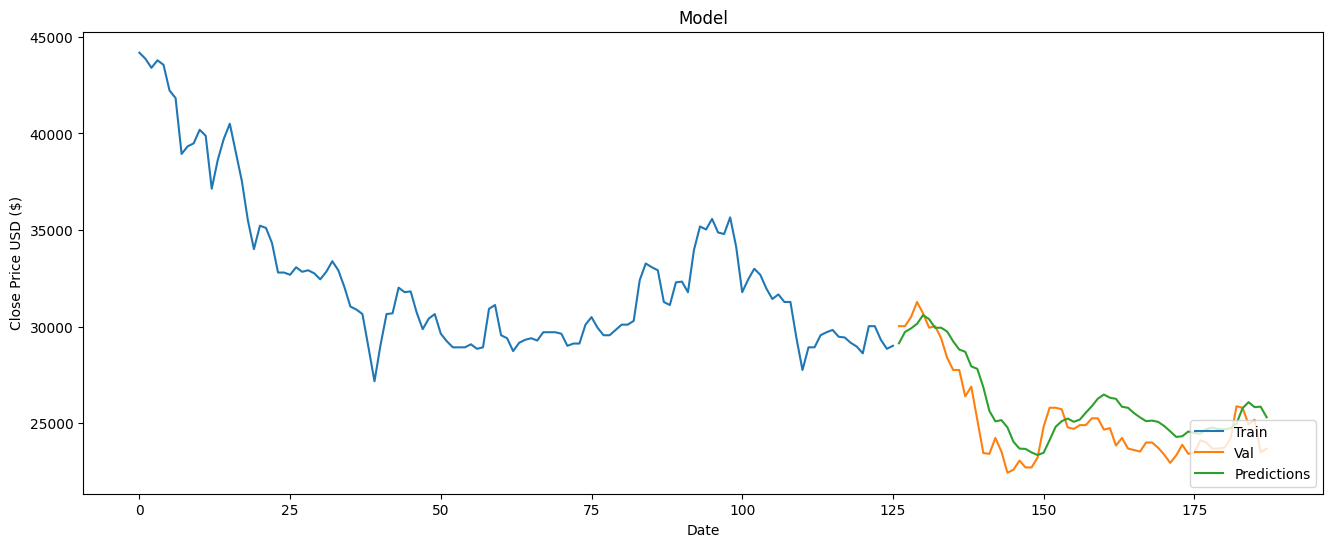

In [24]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Price'])
plt.plot(valid[['Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()